In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
''' Perceptron Implementation Exercise 1.4'''

def sign(w_x):
    ''' 
    Returns the sign of a given number.

    Parameters:
    -- w_x: np.array resulting from the dot product of w*x
    
    Returns:
    -- np.array of signs
    '''
    return np.sign(w_x)

# find a misclassified example and correct it
def perceptron(weights, input_x, y):
    '''
    Calculates the inner product of two vectors.
    
    Parameters:
    -- weights: 1xD np.array containing the weights
    -- input_x: NxD np.array, where N is the amount of x's and D is the dimensions of each x

    returns:
    -- pred: perceptron prediction on one x example
    '''
    # perform the dot product and get the sign
    dot_prod = weights.dot(input_x.T) # becomes a 1xN matrix
    pred = sign(dot_prod)
    return pred

def slope(m, x, intercept):
    '''
    Returns where the line is at a certain point x.

    Parameters:
    -- m: rate of change
    -- x: x-coordinate
    -- intercept: y-intercept of the slope 
    '''
    return m * x + intercept

def update_weights(weights, y, input_x, predictions):
    '''
    Returns the updated weights using a misclassified x.

    Parameters:
    -- weights: 1xD np.array containing weights
    -- y: 1xN np.array of target labels based on target function
    -- input_x: NxD np.array, where N is the amount of x's and D is the dimensions of each x
    -- predictions: 1xN np.array of the hypothesis function predictions
    '''
    
    # find all misclassified examples
    misclassified = np.where(y != predictions)[0]  # get indices of misclassified points
    
    if len(misclassified) > 0:
        # randomly select one misclassified example
        id_x = random.choice(misclassified)
        
        # update the weights based on the misclassified example
        update = weights + y[id_x] * input_x[id_x]
        return update
    else:
        return weights  # no update if no misclassifications

def pre_classify(input_x, y_intercept, m, y):
    '''
    returns a list of the valid (above target function) and invalid points (below target function)

    Parameters:
    -- input_x: NxD np.array, where N is the amount of x's and D is the dimensions of each x
    -- y_intercept: y-intercept of target function
    -- m: slope of target function

    Returns:
    -- valid: list of x's above the target function
    -- invalid:" list of x's below the target function
    '''

    valid = []
    invalid = []
    for i in range(len(input_x)):
        slp = slope(m, input_x[i][1], y_intercept)
        if (slp < input_x[i][2]):
            y[i] = 1
            valid.append(input_x[i])
        elif (slp > input_x[i][2]):
            y[i] = -1
            invalid.append(input_x[i])

    return valid, invalid

def PLA_algorithm(classification, y, predictions, weights):
    '''
    Runs the perceptron algorithm on misclassified examples until it converges and
    fits the data.

    Parameters:
    -- classification: boolean indicating is our predictions are the same as y
    -- y: 1xN np.array of target labels based on target function
    -- prediction: 1xN np.array of target labels based on hypothesis, i.e. weights
    -- weights: 1xD np.array containing weights
    
    Returns:
    -- itr: number of iterations it took for PLA_algorithm to converge

    '''

    itr = 0
    while classification == False:
        # update the weights
        weights = update_weights(weights, y, input_x, predictions)
    
        # check again
        predictions = perceptron(weights, input_x, y)
        classification = np.array_equal(y, predictions)  # directly compare y and predictions
    
        if itr > 100000:
            print("Did not converge")
            print("Current weights:", weights)  # print the weights before breaking
            break
        itr += 1

    return itr, classification, weights, predictions


# Parameters

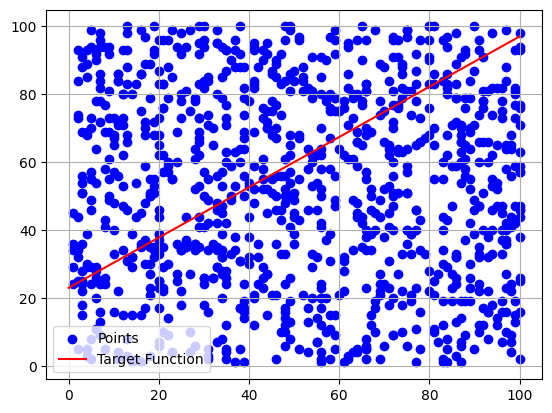

In [14]:
dim = 2
n = 1000
input_x = np.ceil(abs(np.random.rand(n, dim + 1) * 100))
input_x[:, 0] = 1
y = np.zeros(n) # instantiate output

# Generate a random target function
m = np.random.rand() * 2        
y_intercept =  np.random.randint(0, 50)

# Plot the points on a Cartesian plane, scatter plot
plt.scatter(input_x[:, 1], input_x[:, 2], color='blue', label='Points')
plt.plot([0, 100], [y_intercept, m * 100 + y_intercept], color='red', label='Target Function')
# plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='black')

# Display the plot
plt.grid(True)
plt.legend()
plt.show()

In [15]:
'''
-- A random line is chosen as my target function, the points above it are +1 and the ones below are -1

-- Now we get the y values based on this target ==>
'''
# separates valid and invalid points
valid, invalid = pre_classify(input_x, y_intercept, m, y)

# change these to numpy.arrays
valid = np.array(valid)
invalid = np.array(invalid)

print("valid and invalid shape:")
print(valid.shape)
print(invalid.shape)


valid and invalid shape:
(405, 3)
(595, 3)


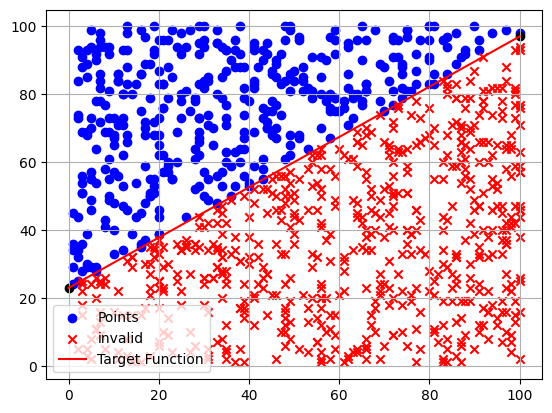

In [16]:
# Create the plot
fig, ax = plt.subplots()
ax.scatter(valid[:, 1], valid[:, 2], color='blue', label='Points', marker="o")
ax.scatter(invalid[:, 1], invalid[:, 2], color='red', label='invalid', marker="x")
plt.plot([0, 100], [y_intercept, m * 100 + y_intercept], color='red', label='Target Function')
ax.scatter([0, 100], [y_intercept, m * 100 + y_intercept], color='black')

plt.grid(True)
plt.legend()
plt.show()

In [17]:
# initialize weights and set up initial predictions
weights = np.zeros(dim + 1)  # initialize as a 1D array
predictions = perceptron(weights, input_x, y)
classification = np.array_equal(y, predictions)

itr, classification, weights, predictions = PLA_algorithm(classification, y, predictions, weights)

# check iteration performance and weights
print("Iterations:", itr)
print("Final weights:", weights)

Iterations: 55075
Final weights: [-12369.   -395.    535.]


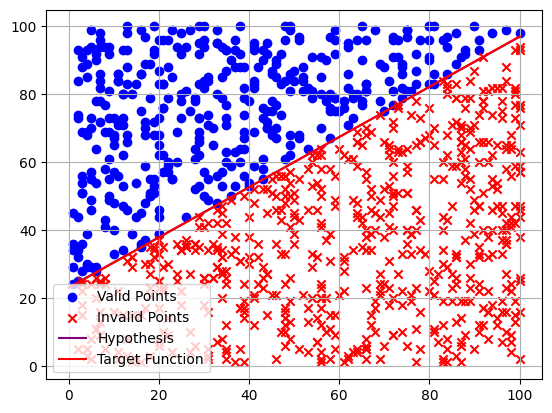

In [18]:
# Calculate slope (a) and intercept (b) from weights
a = -(weights[1] * 100 / weights[2])
b = -(weights[0] / weights[2])

# Create the plot, scatter for valid and invalid points
fig, ax = plt.subplots()
ax.scatter(valid[:, 1], valid[:, 2], color='blue', label='Valid Points', marker="o")
ax.scatter(invalid[:, 1], invalid[:, 2], color='red', label='Invalid Points', marker="x")

# Plot hypothesis g(x) and target function
ax.plot([0, 100], [b, a + b], color='purple', label='Hypothesis')
plt.plot([0, 100], [y_intercept, m * 100 + y_intercept], color='red', label='Target Function')
plt.grid(True)
plt.legend()
plt.show()
